In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('24824_33185_compressed_housing.csv.zip')

In [3]:
df = df1.copy(deep = True)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<ipython-input-6-7f5047aea6db>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i + 1)


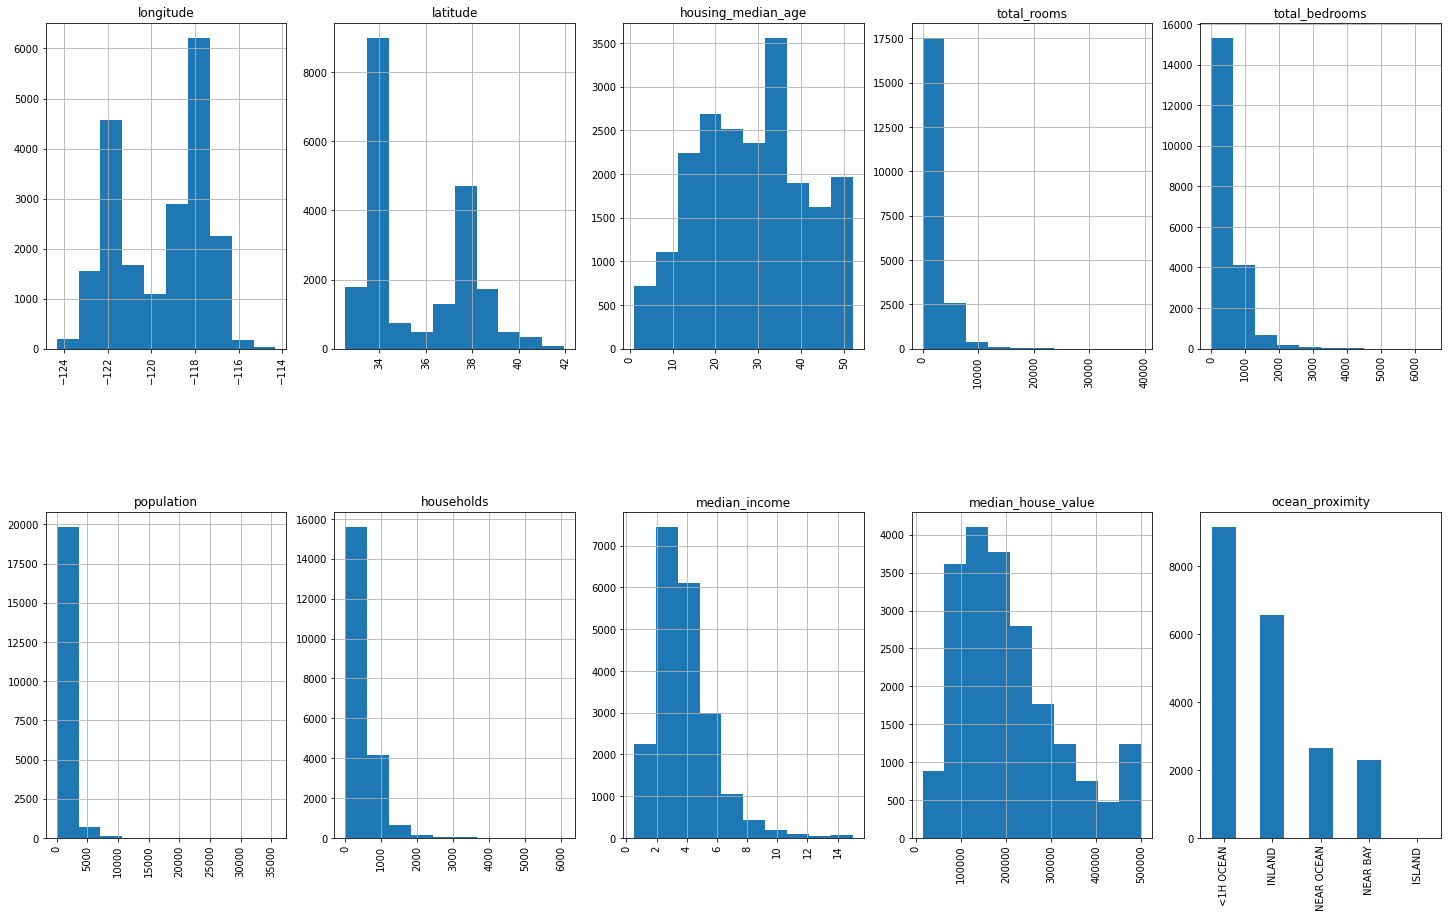

In [6]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(df.shape[1]) / cols)

for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

<AxesSubplot:>

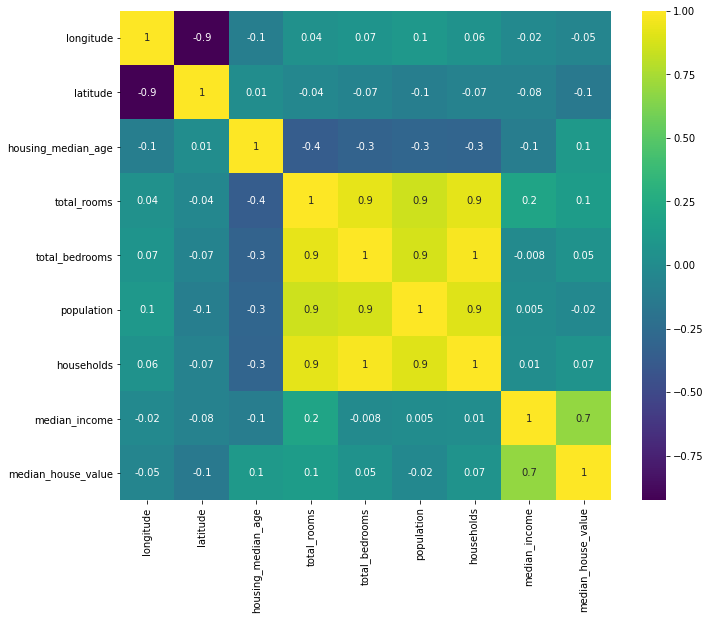

In [7]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(), annot=True, fmt='.1g',cmap='viridis')

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

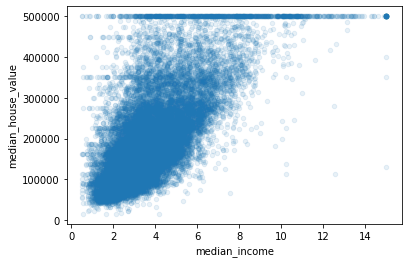

In [12]:
df.plot.scatter(x='median_income',y='median_house_value',alpha=0.1)

<AxesSubplot:xlabel='housing_median_age', ylabel='population'>

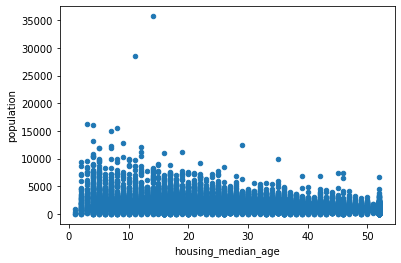

In [13]:
df.plot.scatter(x='housing_median_age',y='population')

In [14]:
df = df[df['population']<20000]

In [15]:
df['rooms_per_bedrooms'] = df['total_rooms'] / df['total_bedrooms']
df['rooms_per_households'] = df['total_rooms'] / df['households']
df['households_per_pop'] = df['households'] / df['population']

<ipython-input-15-e18c3b54cfb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms_per_bedrooms'] = df['total_rooms'] / df['total_bedrooms']
<ipython-input-15-e18c3b54cfb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms_per_households'] = df['total_rooms'] / df['households']
<ipython-input-15-e18c3b54cfb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [16]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688059
rooms_per_bedrooms      0.367233
households_per_pop      0.264837
rooms_per_households    0.151949
total_rooms             0.135955
housing_median_age      0.105547
households              0.067277
total_bedrooms          0.050663
population             -0.023716
longitude              -0.045979
latitude               -0.144184
Name: median_house_value, dtype: float64

In [17]:
c = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'rooms_per_bedrooms',
       'households_per_pop','rooms_per_households','median_house_value']
df = df.reindex(columns=c,)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_bedrooms,households_per_pop,rooms_per_households,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.821705,0.391304,6.984127,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.418626,0.473969,6.238137,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,7.721053,0.356855,8.288136,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.421277,0.392473,5.817352,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,5.810714,0.458407,6.281853,342200.0


In [18]:
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_bedrooms', 'households_per_pop', 'rooms_per_households',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [20]:
scaler = MinMaxScaler()

col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_bedrooms', 'households_per_pop', 'rooms_per_households',
        'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN','median_house_value']

values = df[col].values

scale_df = scaler.fit_transform(values)

In [21]:
df_t = pd.DataFrame(scale_df, columns=col,index = df.index)

In [22]:
df_t.head()#.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_bedrooms,households_per_pop,rooms_per_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.020615,0.019568,0.023334,0.539668,0.243483,0.270497,0.043512,0.0,0.0,0.0,1.0,0.0,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.177967,0.147099,0.212246,0.538027,0.228308,0.327758,0.038224,0.0,0.0,0.0,1.0,0.0,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.030440,0.030242,0.032854,0.466028,0.277339,0.246634,0.052756,0.0,0.0,0.0,1.0,0.0,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.037687,0.034045,0.040694,0.354699,0.190762,0.271306,0.035241,0.0,0.0,0.0,1.0,0.0,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.044935,0.034474,0.048161,0.230776,0.205423,0.316978,0.038534,0.0,0.0,0.0,1.0,0.0,0.674638


In [23]:
data = df_t.copy()

In [24]:
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
lin_pred = lin_reg.predict(X_test)

In [31]:
mse = mean_squared_error(lin_pred, y_test)
rmse = np.sqrt(mse)
print('RMSE :',rmse)

RMSE : 0.1364004394638108


In [32]:
score = lin_reg.score(X_train, y_train)
print('score:',score*100)

score: 67.32789816666511


In [33]:
pd.DataFrame(zip(X.columns,lin_reg.coef_))

,0,1
0,longitude,-0.599392
1,latitude,-0.550644
2,housing_median_age,0.109714
3,total_rooms,-0.292092
4,total_bedrooms,0.293288
5,population,0.142215
6,households,-0.029919
7,median_income,1.183169
8,rooms_per_bedrooms,-0.231490
9,households_per_pop,0.914168


In [34]:
pd.DataFrame(zip(y_test,lin_pred),columns=['True','Predicted'])

,True,Predicted
0,0.112167,0.168412
1,0.063507,0.245412
2,0.183094,0.170296
3,0.188249,0.220661
4,0.343093,0.386544
...,...,...
6806,0.349279,0.199002
6807,0.231960,0.262138
6808,0.243300,0.215151
6809,0.828865,0.612669


In [35]:
data2 = data.copy()

In [36]:
data2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_bedrooms', 'households_per_pop', 'rooms_per_households',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'median_house_value'],
      dtype='object')

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
forest_reg = RandomForestRegressor(max_depth=None,random_state=42)
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)

mse = mean_squared_error(forest_pred, y_test)
rmse = np.sqrt(mse)
print('RMSE:',rmse)


RMSE: 0.10256296898490656


In [65]:
score = forest_reg.score(X_train, y_train)
print('score:',score*100)

score: 97.31523798988563
